In [1]:
import pandas_datareader as pdr
key=""


In [2]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [3]:
df.to_csv('AAPL.csv')

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('AAPL.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-06-30 00:00:00+00:00,95.60,95.770,94.30,94.44,35836356,22.323886,22.363583,22.020318,22.053010,143345424,0.0,1.0
1,AAPL,2016-07-01 00:00:00+00:00,95.89,96.465,95.33,95.49,26026540,22.391605,22.525875,22.260837,22.298199,104106160,0.0,1.0
2,AAPL,2016-07-05 00:00:00+00:00,94.99,95.400,94.46,95.39,27705210,22.181442,22.277183,22.057680,22.274848,110820840,0.0,1.0
3,AAPL,2016-07-06 00:00:00+00:00,95.53,95.660,94.37,94.60,30949090,22.307540,22.337896,22.036664,22.090372,123796360,0.0,1.0
4,AAPL,2016-07-07 00:00:00+00:00,95.94,96.500,95.62,95.70,25139558,22.403280,22.534048,22.328556,22.347237,100558232,0.0,1.0


In [6]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-06-22 00:00:00+00:00,133.98,134.080,131.62,132.13,74783618,133.98,134.080,131.62,132.13,74783618,0.0,1.0
1253,AAPL,2021-06-23 00:00:00+00:00,133.70,134.320,133.23,133.77,60214200,133.70,134.320,133.23,133.77,60214200,0.0,1.0
1254,AAPL,2021-06-24 00:00:00+00:00,133.41,134.640,132.93,134.45,68710998,133.41,134.640,132.93,134.45,68710998,0.0,1.0
1255,AAPL,2021-06-25 00:00:00+00:00,133.11,133.890,132.81,133.46,70783746,133.11,133.890,132.81,133.46,70783746,0.0,1.0
1256,AAPL,2021-06-28 00:00:00+00:00,134.78,135.245,133.35,133.41,62111303,134.78,135.245,133.35,133.41,62111303,0.0,1.0


In [7]:
df1=df.reset_index()['close']
df1

0        95.60
1        95.89
2        94.99
3        95.53
4        95.94
         ...  
1252    133.98
1253    133.70
1254    133.41
1255    133.11
1256    134.78
Name: close, Length: 1257, dtype: float64

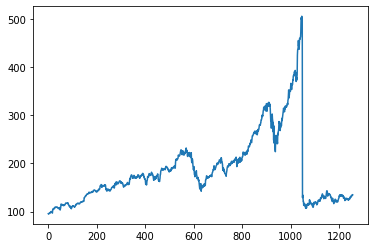

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [9]:
import numpy as np

In [10]:
df1

0        95.60
1        95.89
2        94.99
3        95.53
4        95.94
         ...  
1252    133.98
1253    133.70
1254    133.41
1255    133.11
1256    134.78
Name: close, Length: 1257, dtype: float64

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
print(df1)

[[0.00148382]
 [0.00218925]
 [0.        ]
 ...
 [0.09345658]
 [0.09272683]
 [0.0967891 ]]


In [13]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [14]:
training_size,test_size

(817, 440)

In [15]:
train_data

array([[0.00148382],
       [0.00218925],
       [0.        ],
       [0.00131355],
       [0.00231087],
       [0.00411092],
       [0.00484067],
       [0.00591097],
       [0.0045731 ],
       [0.00924349],
       [0.00921917],
       [0.01177329],
       [0.01187059],
       [0.01208952],
       [0.01080029],
       [0.00892727],
       [0.00571637],
       [0.0040866 ],
       [0.01936269],
       [0.02274386],
       [0.02242763],
       [0.02690343],
       [0.02308441],
       [0.02627098],
       [0.02646558],
       [0.0303819 ],
       [0.03254683],
       [0.03361712],
       [0.0316468 ],
       [0.03147653],
       [0.03208465],
       [0.0352469 ],
       [0.03500365],
       [0.03461445],
       [0.0342739 ],
       [0.034955  ],
       [0.03288738],
       [0.03371442],
       [0.03171978],
       [0.03060083],
       [0.02906835],
       [0.02877645],
       [0.0267818 ],
       [0.02702505],
       [0.02855753],
       [0.03099003],
       [0.03091705],
       [0.032

In [16]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [17]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [18]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [19]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [20]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [22]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 270ms/step - loss: 0.0125 - val_loss: 0.0454
Epoch 2/100
12/12 [==============================] - 2s 165ms/step - loss: 0.0027 - val_loss: 0.0303
Epoch 3/100
12/12 [==============================] - 2s 164ms/step - loss: 0.0015 - val_loss: 0.0293
Epoch 4/100
12/12 [==============================] - 2s 163ms/step - loss: 8.6455e-04 - val_loss: 0.0227
Epoch 5/100
12/12 [==============================] - 2s 163ms/step - loss: 5.4238e-04 - val_loss: 0.0234
Epoch 6/100
12/12 [==============================] - 2s 160ms/step - loss: 4.8689e-04 - val_loss: 0.0232
Epoch 7/100
12/12 [==============================] - 2s 165ms/step - loss: 4.6413e-04 - val_loss: 0.0213
Epoch 8/100
12/12 [==============================] - 2s 168ms/step - loss: 4.4564e-04 - val_loss: 0.0207
Epoch 9/100
12/12 [==============================] - 2s 169ms/step - loss: 4.2709e-04 - val_loss: 0.0205
Epoch 10/100
12/12 [==============================] - 2s 164ms/step

In [25]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [26]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [48]:
test_predict

array([[285.6173   ],
       [277.86014  ],
       [266.14685  ],
       [254.5723   ],
       [242.49457  ],
       [231.95139  ],
       [229.60782  ],
       [233.49066  ],
       [243.18063  ],
       [253.24358  ],
       [259.45578  ],
       [256.15778  ],
       [248.90169  ],
       [239.8354   ],
       [226.64029  ],
       [217.49696  ],
       [208.46794  ],
       [201.78548  ],
       [197.33598  ],
       [194.89618  ],
       [191.6768   ],
       [186.94867  ],
       [185.4641   ],
       [187.86203  ],
       [195.19566  ],
       [203.64836  ],
       [211.74791  ],
       [217.9224   ],
       [219.179    ],
       [216.7129   ],
       [211.95528  ],
       [210.41129  ],
       [212.69159  ],
       [218.82823  ],
       [227.25067  ],
       [236.59991  ],
       [247.39838  ],
       [257.43747  ],
       [265.24243  ],
       [269.12402  ],
       [268.0897   ],
       [261.98795  ],
       [254.8539   ],
       [249.24316  ],
       [247.90633  ],
       [25

In [27]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

174.33926832385927

In [28]:
math.sqrt(mean_squared_error(ytest,test_predict))

212.54887985549874

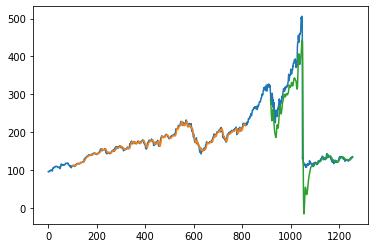

In [29]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [30]:
len(test_data)

440

In [31]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [32]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [33]:
temp_input

[0.10160544879591338,
 0.10197032352225738,
 0.0997810751641936,
 0.09827292629530526,
 0.09764047676964244,
 0.09822427633179276,
 0.09292143030892724,
 0.08720505959620534,
 0.08445633665774754,
 0.08484553636584774,
 0.07543176842617366,
 0.07509121868158597,
 0.07385064461201651,
 0.06324495256628554,
 0.06390172707370473,
 0.07978594016054491,
 0.0732911700316225,
 0.06584772561420582,
 0.06115300413524688,
 0.06429092678180492,
 0.05198248601313549,
 0.06347603989297007,
 0.060788129408902936,
 0.06560447579664314,
 0.06334225249331066,
 0.07054244709316465,
 0.07438579421065433,
 0.07241547068839699,
 0.062126003405497454,
 0.06081245439065919,
 0.06908294818778887,
 0.06701532473850647,
 0.06105570420822187,
 0.06227195329603502,
 0.06378010216492336,
 0.06421795183653611,
 0.060593529554852865,
 0.0660666504500122,
 0.0681342738992946,
 0.07518851860861109,
 0.07594259304305523,
 0.08005351495986379,
 0.08603746047190469,
 0.09244709316468014,
 0.08817805886645586,
 0.09593772

In [38]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>99):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.10197032 0.09978108 0.09827293 0.09764048 0.09822428 0.09292143
 0.08720506 0.08445634 0.08484554 0.07543177 0.07509122 0.07385064
 0.06324495 0.06390173 0.07978594 0.07329117 0.06584773 0.061153
 0.06429093 0.05198249 0.06347604 0.06078813 0.06560448 0.06334225
 0.07054245 0.07438579 0.07241547 0.062126   0.06081245 0.06908295
 0.06701532 0.0610557  0.06227195 0.0637801  0.06421795 0.06059353
 0.06606665 0.06813427 0.07518852 0.07594259 0.08005351 0.08603746
 0.09244709 0.08817806 0.09593773 0.09009973 0.096108   0.09528095
 0.09693505 0.09272683 0.0936755  0.08988081 0.09567015 0.09664315
 0.09584043 0.0938701  0.09362685 0.08871321 0.09134031 0.07993189
 0.08054001 0.08452931 0.08567259 0.07749939 0.07521284 0.0675748
 0.0729263  0.07895889 0.07608854 0.0726344  0.0722452  0.07861834
 0.07404524 0.07810752 0.07762102 0.07749939 0.07368037 0.0720506
 0.07124787 0.07314522 0.06944782 0.07516419 0.07518852 0.07723182
 0.07818049 0.07569934 0.07871564 0.08632936 0.0842860

In [39]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [40]:
import matplotlib.pyplot as plt

In [41]:
len(df1)

1257

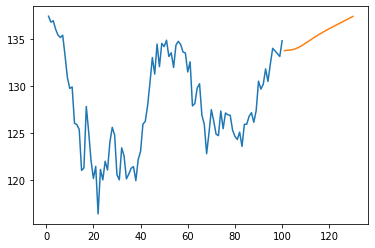

In [44]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

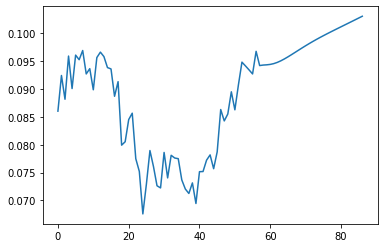

In [45]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [46]:
df3=scaler.inverse_transform(df3).tolist()

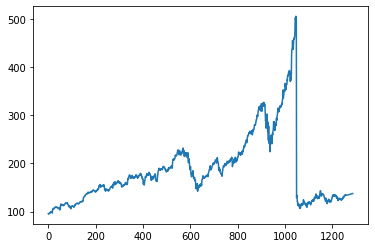

In [47]:
plt.plot(df3)